In [2]:
from NS_backflow_server import *

In [3]:
artery = Artery(diam_steno_vessel, diam_narrow, theta_steno, diam_healthy_vessel, theta_healthy)
mesh = artery.mesh(mesh_precision)
File('NSdata/artery.xml.gz') << mesh
# mesh = Mesh('NSdata/artery.xml.gz')

# Solver
T = .01
num_steps = 10
flag_movie = False
flag_cleanup = True 
flag_diagnosis = True
flag_IPCS = True
with_teman = False
with_bf_est = False
freq_plot = 1
uname = 'NSdata/u_series'
pname = 'NSdata/p_series'

u,p,files = compute_NSsolution(mesh,
T=T,
num_steps=num_steps,
mu=mu,
rho=rho,
c=c,
Rd=Rd,
Rp=Rp,
p_windkessel_1=p_windkessel_1,
p_windkessel_2=p_windkessel_2,
u0=u0,
s = s,
uname = uname,
pname = pname,
flag_movie=flag_movie)

t = 0.0100u_max:0.65, p_max:5.50 : : 0.010000000000000002it [00:01, 153.34s/it]                        


Plotting... t = 0.0100: : 0.010000000000000002it [00:01, 177.06s/it]                        


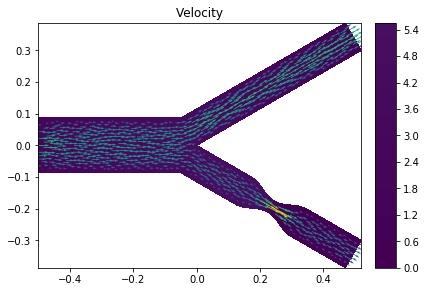

In [6]:
writename = './output/output.mp4'
make_movie_IPCS(mesh, 
                T,
            num_steps,
            uname = 'NSdata/u_series',
            pname = 'NSdata/p_series',
            writename = writename)

In [7]:
import io
import base64
from IPython.display import HTML

video = io.open(writename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))